# We're going to go try out some spectral analysis techniques on simulated 'spectra'.












# **Introduction to Spectra.**


We use spectra to figure out which **minerals** are present onother planets.

Once we have an idea of **what** is present we can start to build a picture of the environment, climate, history and geology of the site.






#**Trial Spectra**
Creating some nice, clean, simple simulated spectra for now.



In [12]:
#Lets import our libraries
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import statistics as stats


x = np.arange(0, 1000, 1)
#Our x data will start at 1nm and go up to 1000nm in steps of 1nm.
#This would be the same as writing out all the values between 1 and 1000 in square brackets [1,2,3..., 1000]

y = ( (np.sin(x/98) * np.cos(x/145)) * 80) + 20
#Dont worry about this function it is just supposed to look similar to spectra

print ('Data Creation Complete')

Data Creation Complete


#**Finding spectral signatures**



Spectral signatures aren't inherently useful on their own. We need a database of the samples we're interested in to compare to.

Let's plot the data and identify the points of interest.
The majority of people measure points of interest manually.

1) Use the vertical line plotting function to plot coloured lines over the maximum turning points and the minimum turning points. From now on we'll refer to them as points of interest.


2) Find the maximum and minimum value of the data and plot two horizontal lines to show where they are.

Pick different coloured lines to your vertical markers.


#**Extension Exercise**
**Systematic Searching**

3) Write a programme to systematically search for maximum and minimum 'points of interest' and return their values.

In [65]:
#Your code here

from typing import TypedDict

class Coordinate(TypedDict):
    x: int
    y: float


def search_turning_points(data: list[float]) -> list[Coordinate]:

    
    prevPoint: float = data.pop(0)
    upwards: bool = True

    indexes = []

    for i, point in enumerate(data):
        directionChanged = (upwards and point < prevPoint) or (not upwards and point > prevPoint)

        if directionChanged:
            upwards = not upwards
            print(f"Changed direction at index {i}")
            indexes.append((i, point))

        prevPoint = point
    
    return indexes





turning_points = search_turning_points(list(y))

Changed direction at index 103
Changed direction at index 268
Changed direction at index 460
Changed direction at index 649
Changed direction at index 816


99.94830528265814


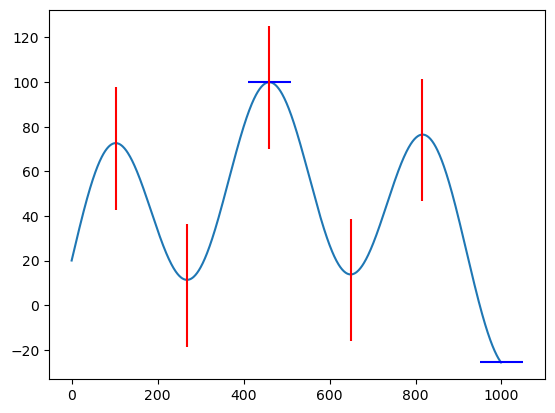

In [57]:
#Your Code here


import matplotlib.pyplot as plt
import matplotlib


plt.plot(y)

print(max(y))


plt.hlines(
    y = min(y),
    xmin = list(y).index(min(y)) - 50,
    xmax = list(y).index(min(y)) + 50,
    colors = "blue"
)


plt.hlines(
    y = max(y),
    xmin = list(y).index(max(y)) - 50,
    xmax = list(y).index(max(y)) + 50,
    colors = "blue"
)


for i, point in turning_points:
    plt.vlines(
        x = i,
        ymin = point - 30,
        ymax = point + 25,
        colors = "red"
    )
    





So, the points of interest are?

In [72]:
points_of_interest = [p[0] for p in turning_points]
points_of_interest



[268, 460, 649, 816]

#**Spectral Algebra**

In [70]:
turning_points = search_turning_points(list(y))

print('=' * 30)

previousPair = turning_points.pop(0)

for index, pair in enumerate(turning_points):
    slope = (pair[1] - previousPair[1]) / (pair[0] - previousPair[0])
    print(f"The slope between points of interest {index} and {index+1} is {slope:.3f}")

    ratio = pair[1] / previousPair[1]
    print(f"    The ratio of reflectance between {index} and {index+1} is {ratio:.3f}")

    print('-' * 30)


Changed direction at index 103
Changed direction at index 268
Changed direction at index 460
Changed direction at index 649
Changed direction at index 816
The slope between points of interest 0 and 1 is -0.372
    The ratio of reflectance between 0 and 1 is 0.156
------------------------------
The slope between points of interest 1 and 2 is 0.076
    The ratio of reflectance between 1 and 2 is 1.376
------------------------------
The slope between points of interest 2 and 3 is -0.108
    The ratio of reflectance between 2 and 3 is 0.190
------------------------------
The slope between points of interest 3 and 4 is 0.005
    The ratio of reflectance between 3 and 4 is 1.053
------------------------------


**Now we have points of interest we can do some basic spectral algebra**



1.   Find the **slope** between your first two points of interest: $(X_{1}, Y_{1}), (X_{2}, Y_{2})$.



\begin{align}
Slope = \frac{y_{2}-y_{1}}{x_{2}- x_{1}}
\end{align}


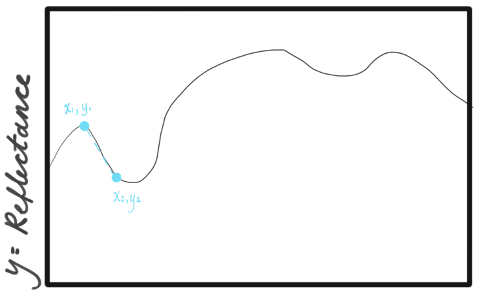

---


2.   Find the **ratio** of reflectance between your first two points of interest $(X_{1}, Y_{1}), (X_{2}, Y_{2})$.

\begin{align}
Ratio = \frac{y_{2}}{y_{1}}
\end{align}

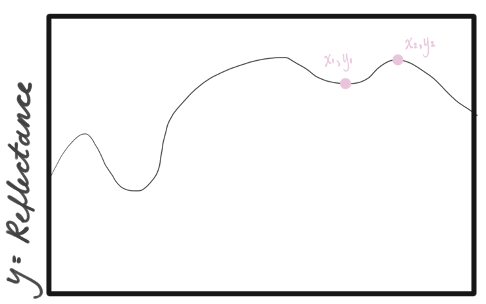

---

3.   Finding the shoulder height or band depth between two points.

Select the point to measure band depth: $(X_{c}, Y_{c})$

Identify the closest two points  of interest either side: $(X_{1}, Y_{1}), (X_{2}, Y_{2})$.

Find the gradient of the line between these two points. This line is known as the continuum in this case.

Identify the theoretical point $(X_{c}, Y_{c}')$ that lies on the continuum line.
\begin{align}
\text{Band depth/Shoulder Height} = Y_{c}-Y_{c}'
\end{align}

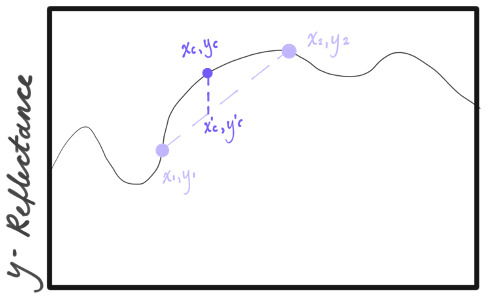

In [78]:
def calculate_band_depth(x: int, points_of_interest: list[int]) -> float:

    if x in points_of_interest: return 0 # Yc - Yc' = 0

    point_height: float = list(y)[x]

    
    lt = [p for p in points_of_interest if p < x]; gt = [p for p in points_of_interest if p > x]
    close_points: tuple[int] = (max(lt), min(gt))

    dy: float = close_points[1] - close_points[0]
    ratio: float = (x - close_points[0]) / (dy)

    expected_y_height: float = ratio * dy

    print(f"{expected_y_height=:.3f}; {point_height=:.3f}")

    return point_height - expected_y_height

calculate_band_depth(300, [268, 460, 649, 816])

expected_y_height=32.000; point_height=16.931


-15.068802662585163

### Slopes between all Maximas and Minimas, given some point data.

1. Find the Points of Interest / turning points within the data into a list of POIs.
2. Graph max, min, and POIs with horizontal and vertical lines respectively
3. Between start, each POI, and end, calculate: 
    1. gradient
    2. ratio of reflectance


In [94]:
import matplotlib.pyplot as plt
from typing import TypedDict

class AnalyzedData(TypedDict):
    points_of_interest: list[Coordinate]
    get_band_depth: callable
    plot: callable

# Accepts either a list of y values or a list of (x, y) pairs
def analyze_data(data: list[float]) -> AnalyzedData:
    
    type Coordinate = tuple[int, float]
    y = data
    data = [(i, d) for i, d in enumerate(data)]
    
    print(data)

    def find_POIs(dataC: list[Coordinate]) -> list[Coordinate]:
        data = dataC
        
        prevPoint: float = data.pop(0)
        upwards: bool = True

        indexes = []

        for i, point in enumerate(data):
            directionChanged = (upwards and point < prevPoint) or (not upwards and point > prevPoint)

            if directionChanged:
                upwards = not upwards
                print(f"Changed direction at index {i}")
                indexes.append((i, point))

            prevPoint = point
        
        return indexes

    points_of_interest = find_POIs(data)

    previous_POI = points_of_interest.pop(0)

    for poi in points_of_interest:
        slope = (poi[1] - previous_POI[1]) / (poi[0] - previous_POI[0])
        print(f"The slope between points of interest {index} and {index+1} is {slope:.3f}")

        ratio = poi[1] / previous_POI[1]
        print(f"    The ratio of reflectance between {index} and {index+1} is {ratio:.3f}")

    def calculate_band_depth(x: int) -> float:
        points_of_interest = find_POIs(data)
        point_height: float = list(y)[x]

    
        lt = [p for p in points_of_interest if p < x]; gt = [p for p in points_of_interest if p > x]
        close_points: tuple[int] = (max(lt), min(gt))

        dy: float = close_points[1] - close_points[0]
        ratio: float = (x - close_points[0]) / (dy)

        expected_y_height: float = ratio * dy

        print(f"{expected_y_height=:.3f}; {point_height=:.3f}")

        return point_height - expected_y_height

    def plot_data():
        print(data)
        data_to_plot = [d[1] for d in data]

        plt.plot(data_to_plot)
        
        pass

    return {
        "points_of_interest": find_POIs(data),
        "get_band_depth": calculate_band_depth,
        "plot": plot_data
    }

def plot_data(data: list[float] | list[tuple[int, float]]) -> dict:
    
    type Coordinate = tuple[int, float]

    if isinstance(data, list[float]): # convert to coords
        data = []; [data.append((x, y) for x, y in enumerate(data))]


analyze_data(list(y))



[(0, 20.0), (1, 20.81629295143194), (2, 21.632384439483875), (3, 22.448073059281235), (4, 23.263157522943196), (5, 24.077436718036836), (6, 24.89070976597993), (7, 25.70277608037545), (8, 26.513435425260596), (9, 27.322487973253388), (10, 28.129734363579832), (11, 28.93497575996464), (12, 29.73801390836865), (13, 30.53865119455601), (14, 31.3366907014743), (15, 32.13193626643088), (16, 32.92419253804865), (17, 33.71326503298468), (18, 34.49896019239502), (19, 35.28108543812923), (20, 36.05944922863833), (21, 36.83386111457948), (22, 37.604131794101576), (23, 38.37007316779527), (24, 39.13149839329142), (25, 39.8882219394922), (26, 40.6400596404187), (27, 41.38682874865951), (28, 42.12834798840466), (29, 42.864437608049194), (30, 43.59491943235125), (31, 44.319616914129305), (32, 45.038355185483425), (33, 45.75096110852557), (34, 46.45726332560422), (35, 47.15709230900841), (36, 47.850280410136996), (37, 48.53666190811838), (38, 49.21607305786683), (39, 49.88835213756104), (40, 50.55333

IndexError: pop from empty list

#**1) Slope from Maxima 1 to Minima 1**

In [ ]:
#Your code goes here

#**1)Ratio from Maxima 1 to Minima 1**

In [ ]:
#Your code goes here

#**1) Band depth at Minima 1, from Maxima 1 to Minima 2**

In [ ]:
#Your code goes here

In [ ]:
#Your code goes here

In [ ]:
#Your code goes here

#**Your turn**
Simulate some new (preferably more complex) spectra and do some more algebra.


In [ ]:
#Your code goes here

